In [8]:

# ------------------------------------------------- Chroma Vector Store -------------------------------- #

import sys
sys.dont_write_bytecode =True

import os

os.environ['ALLOW_RESET']='TRUE'

import chromadb
import hashlib
from chromadb.utils import embedding_functions

class ChromaDB:
    def __init__(self,store_id="my_data", collection_name="documents", embedding_model_name="all-MiniLM-L6-v2"):
        """
        Initialize the vector store using SentenceTransformer for embeddings.

        :param collection_name: Name of the collection to store documents.
        :param embedding_model_name: SentenceTransformer model name to use for embeddings.
        """
        # Initialize ChromaDB client
        self.client = chromadb.PersistentClient(f"chroma_db/{store_id}") 

        # Initialize the SentenceTransformer model for embeddings
        self.embedding_model = embedding_functions.SentenceTransformerEmbeddingFunction(model_name=embedding_model_name)


        # Create or load collection, providing a custom embedding function
        self.collection = self.client.get_or_create_collection(
            name=collection_name,
            embedding_function=self.embedding_model
        )

    def add_documents(self, documents):
        """
        Add documents to the vector store.
        
        :param documents: List of documents to add.
        :param ids: List of unique IDs for each document.
        """

        ids = [self.generate_short_unique_id(i) for i  in documents]
               
        if len(documents) != len(ids):
            raise ValueError("Documents and IDs must have the same length.")
        
        # Embed the documents using the SentenceTransformer model
        self.collection.add(documents=documents, ids=ids)
        print(f"Added {len(documents)} documents to the database")

    def retrieve_top_n(self, query, n=5):
        """
        Retrieve the top N most similar documents to the query.
        
        :param query: The query document.
        :param n: Number of top documents to retrieve.
        :return: List of top N documents.
        """
        # Embed the query document
        query_embedding = self.embedding_model([query])
        
        # Perform the query on the collection to retrieve top N results
        results = self.collection.query(query_embeddings=query_embedding, n_results=n)

        results = {key:value[0] for key,value in results.items() if key in ['ids','documents']}

        final_result = ""

        for ids,data in zip(*results.values()):

            final_result+=f"Document Id : {ids}\nData : {data}\n\n"

        return final_result.strip()

    def delete_document(self, doc_id):
        """
        Delete a document by its ID.
        
        :param doc_id: ID of the document to delete.
        """
        self.collection.delete(ids=[doc_id])
        print(f"Document with ID {doc_id} deleted.")

    def update_document(self, doc_id, new_document):
        """
        Update an existing document by its ID.
        
        :param doc_id: ID of the document to update.
        :param new_document: The new content for the document.
        """
        # First delete the old document, then add the new one with the same ID.
        self.delete_document(doc_id)
        self.add_documents([new_document])
        print(f"Document with ID {doc_id} updated.")

    def reset(self):

        self.client.reset()

        return "Deleted Existing Data....."
    
    def generate_short_unique_id(self,text, length=8):
        """
        Generate a short unique ID based on the given text using SHA-256 hashing.
        
        :param text: Input text to generate the unique ID from.
        :param length: Length of the unique ID (default is 8 characters).
        :return: A short unique ID string.
        """
        # Generate SHA-256 hash of the text
        hash_object = hashlib.sha256(text.encode('utf-8'))
        
        # Convert the hash to a hexadecimal string and truncate to desired length
        unique_id = hash_object.hexdigest()[:length]
        
        return unique_id

In [9]:
store = ChromaDB()

c:\Users\vishnu.d\AppData\Local\anaconda3\envs\personal_bot\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [10]:

# Retrieve top 2 documents for a query
query = "Vishnu's CVS details"
top_docs = store.retrieve_top_n(query, n=5)

print(top_docs)

Delete of nonexisting embedding ID: doc2
Add of existing embedding ID: 436ff26a
Add of existing embedding ID: 7ba3a89c
Add of existing embedding ID: 436ff26a
Add of existing embedding ID: bc16ec97
Add of existing embedding ID: 7ba3a89c
Add of existing embedding ID: 436ff26a
Add of existing embedding ID: bc16ec97
Add of existing embedding ID: 7ba3a89c
Delete of nonexisting embedding ID: doc2
Delete of nonexisting embedding ID: bc16ec97
Delete of nonexisting embedding ID: doc2
Add of existing embedding ID: 51c11e5f
Delete of nonexisting embedding ID: bc16ec97
Delete of nonexisting embedding ID: doc2
Add of existing embedding ID: 51c11e5f
Delete of nonexisting embedding ID: bc16ec97
Delete of nonexisting embedding ID: doc2
Add of existing embedding ID: 51c11e5f
Add of existing embedding ID: 436ff26a
Add of existing embedding ID: 7ba3a89c
Add of existing embedding ID: 436ff26a
Add of existing embedding ID: bc16ec97
Add of existing embedding ID: 7ba3a89c
Add of existing embedding ID: 436ff2

Document Id : 5a9efff3
Data : Project details for CVS Health assigned to Vishnu: Employee ID: 2678576, Network ID: C805532, Domain: PBM AD, Vendor Name: Supplier Not Listed, Start Date: 15 Sep 2024, Contract End Date: 30 Dec 2024, Email: vishnu.durairaj@cvshealth.com.

Document Id : cd10115e
Data : Employee information for Vishnu: Company Name: Factspan Analytics, Employee ID: 0589, Email ID: vishnu.durairaj@factspan.com.

Document Id : 4f64f2aa
Data : Factspan email password: Mynameisvichu@7

Document Id : dbc5fdcf
Data : Fast Inpaint is an app developed by Alvaro Somoza from the Hugging Face Diffusers team. The app utilizes a lighting fast model with minimal CFG and 12 steps of inference, allowing users to create interesting art pieces by drawing masks and inpainting. Users may need to iterate to achieve desired edits. Access the FREE ZeroGPU app on Hugging Face Spaces: https://lnkd.in/g5f3HqWu. Source: LinkedIn. Date stored: 2024-10-01.

Document Id : 49bdb5a9
Data : GitHub reposito


image 1/1 d:\Projects\Vishnu\personal_bot\page_3_zoomed.png: 640x480 22 voterdetailss, 81.9ms
Speed: 0.0ms preprocess, 81.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


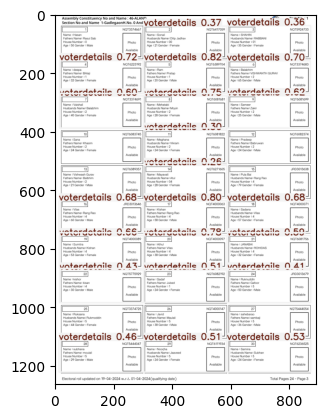

In [21]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt


img_path = "page_3_zoomed.png"

pretrained_checkpoint_path = "best.pt"
model = YOLO(pretrained_checkpoint_path)

result = model.predict(img_path)

plt.imshow(result[0].plot())
plt.show()

In [23]:
result[0].boxes.cls

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])


image 1/1 d:\Projects\Vishnu\personal_bot\page_3_zoomed.png: 640x480 22 voterdetailss, 74.9ms
Speed: 0.0ms preprocess, 74.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


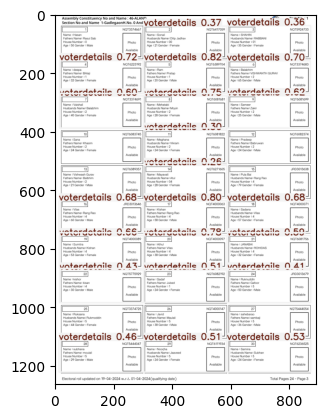

Saved: page_3_zoomed\page_3_zoomed_object_1.jpg
Saved: page_3_zoomed\page_3_zoomed_object_2.jpg
Saved: page_3_zoomed\page_3_zoomed_object_3.jpg
Saved: page_3_zoomed\page_3_zoomed_object_4.jpg
Saved: page_3_zoomed\page_3_zoomed_object_5.jpg
Saved: page_3_zoomed\page_3_zoomed_object_6.jpg
Saved: page_3_zoomed\page_3_zoomed_object_7.jpg
Saved: page_3_zoomed\page_3_zoomed_object_8.jpg
Saved: page_3_zoomed\page_3_zoomed_object_9.jpg
Saved: page_3_zoomed\page_3_zoomed_object_10.jpg
Saved: page_3_zoomed\page_3_zoomed_object_11.jpg
Saved: page_3_zoomed\page_3_zoomed_object_12.jpg
Saved: page_3_zoomed\page_3_zoomed_object_13.jpg
Saved: page_3_zoomed\page_3_zoomed_object_14.jpg
Saved: page_3_zoomed\page_3_zoomed_object_15.jpg
Saved: page_3_zoomed\page_3_zoomed_object_16.jpg
Saved: page_3_zoomed\page_3_zoomed_object_17.jpg
Saved: page_3_zoomed\page_3_zoomed_object_18.jpg
Saved: page_3_zoomed\page_3_zoomed_object_19.jpg
Saved: page_3_zoomed\page_3_zoomed_object_20.jpg
Saved: page_3_zoomed\page_3_z

In [7]:
from ultralytics import YOLO
import os
from PIL import Image
import matplotlib.pyplot as plt

# Load the YOLOv10 model
pretrained_checkpoint_path = "best.pt"
model = YOLO(pretrained_checkpoint_path)

def save_detected_objects(img_path, model):
    # Run inference on the image
    result = model(img_path)
    
    # Plot the result with bounding boxes for visualization
    plt.imshow(result[0].plot())
    plt.show()
    
    # Load the image using PIL
    img = Image.open(img_path)
    img_name = os.path.splitext(os.path.basename(img_path))[0]

    # Create a folder named after the image file
    output_folder = img_name
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Get bounding boxes for detected objects
    detections = result[0].boxes.xyxy  # x1, y1, x2, y2 format
    
    for i, box in enumerate(detections):
        x1, y1, x2, y2 = map(int, box[:4])  # Convert coordinates to integers
        
        # Crop the detected object from the image
        cropped_img = img.crop((x1, y1, x2, y2))
        
        # Save the cropped object
        cropped_img_path = os.path.join(output_folder, f"{img_name}_object_{i+1}.jpg")
        cropped_img.save(cropped_img_path)
        print(f"Saved: {cropped_img_path}")

# Example usage
img_path = "page_3_zoomed.png"
save_detected_objects(img_path, model)


In [1]:
import asyncio
from crawl4ai import AsyncWebCrawler
# import nest_asyncio


async def main():
    async with AsyncWebCrawler(verbose=True) as crawler:
        result = await crawler.arun(url="https://openai.com/api/pricing/")
        print(result.markdown)
        return result.markdown

if __name__ == "__main__":
    result = asyncio.run(main())

RuntimeError: asyncio.run() cannot be called from a running event loop